In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('Data.csv')


In [3]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [4]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [5]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [6]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [7]:
y=data['Tool wear\nTWmax']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [9]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=600)

In [10]:
print('Accuracy score on Test data= {:.7f}'.format(gbr.score(X_test, y_test)))
scores = cross_val_score(gbr, X, y, cv=5)
print(scores)

Accuracy score on Test data= 0.8849699
[0.98992994 0.99633106 0.99895987 0.99527319 0.97944005]


In [11]:
pred=gbr.predict(X_test)
comparison=pd.DataFrame()
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.5f}".format(rmse))
print("R2: {:.5f}".format(r2))

Testing performance
RMSE: 0.02155
R2: 0.88497


In [12]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred
comparison['Std']=comparison.std(axis=1)

In [13]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax,Std
83,0.312,0.311879,0.000085
53,0.415,0.397683,0.012245
70,0.293,0.293084,0.000059
45,0.296,0.295903,0.000068
44,0.237,0.237371,0.000262
39,0.321,0.384553,0.044939
22,0.409,0.408709,0.000206
80,0.415,0.397683,0.012245
10,0.311,0.311956,0.000676
0,0.379,0.384767,0.004078


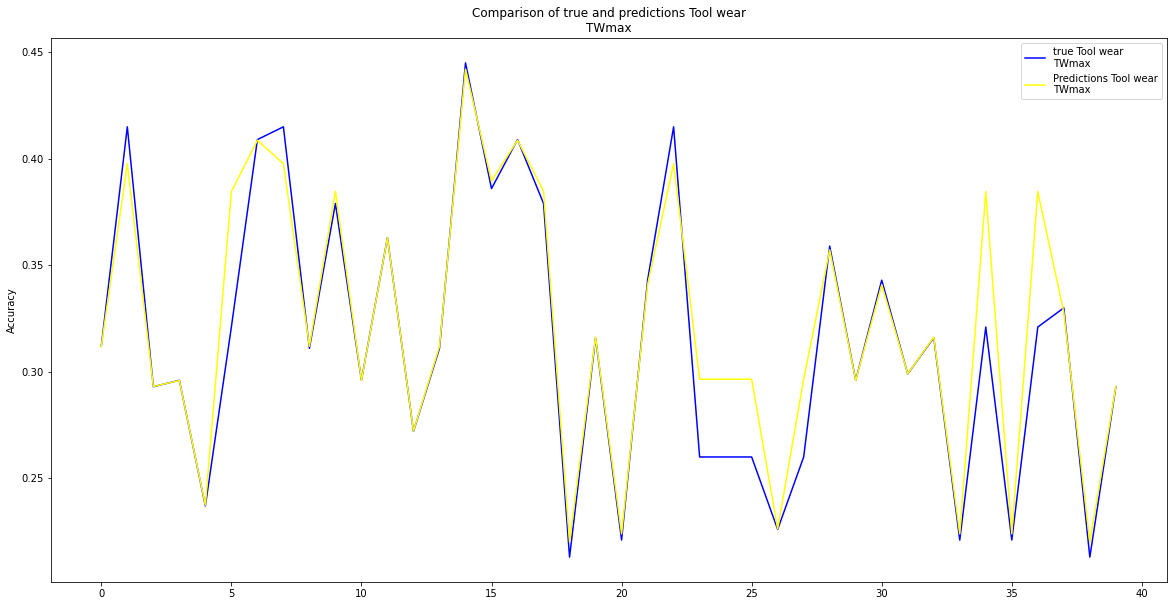

In [66]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [67]:
comparison.to_csv(r'Gboost.csv', index = False, header=True)